<a href="https://colab.research.google.com/github/vishnucramesh/deepfake-detection/blob/master/DeepfakeDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib pillow sklearn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Convolution2D, MaxPooling2D, \
                                    BatchNormalization, BatchNormalization, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
base_path = 'Documents/archive/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
input_shape = ((224,224,3))

model = Sequential([
  Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  Conv2D(32, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  Conv2D(64, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  Conv2D(128, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  Conv2D(256, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  Conv2D(512, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=2),
  BatchNormalization(),
  Dropout(0.2),

  GlobalAveragePooling2D(),
  Dense(512, activation='relu'),
  BatchNormalization(),
  Dense(1, activation='sigmoid'),

])

model.build(input_shape)

model.summary()

2022-07-03 21:04:21.260512: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [ ]:
earlystop_callback = EarlyStopping(monitor='loss', patience=3)
checkpoint_callback = ModelCheckpoint(filepath=f"model.hdf5", 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

history = model.fit(
      train_flow,
      epochs=10,
      steps_per_epoch = 500,
      validation_data = valid_flow,
      validation_steps = 78,
      callbacks=[earlystop_callback, checkpoint_callback]
)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.6656 - accuracy: 0.6377
Epoch 1: val_loss improved from inf to 1.42157, saving model to model.hdf5
500/500 [==============================] - 994s 2s/step - loss: 0.6656 - accuracy: 0.6377 - val_loss: 1.4216 - val_accuracy: 0.5048
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.5803 - accuracy: 0.6995
Epoch 2: val_loss improved from 1.42157 to 1.10160, saving model to model.hdf5
500/500 [==============================] - 998s 2s/step - loss: 0.5803 - accuracy: 0.6995 - val_loss: 1.1016 - val_accuracy: 0.5276
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.7362
Epoch 3: val_loss improved from 1.10160 to 0.91818, saving model to model.hdf5
500/500 [==============================] - 987s 2s/step - loss: 0.5303 - accuracy: 0.7362 - val_loss: 0.9182 - val_accuracy: 0.5859
Epoch 4/10
500/500 [==============================] - ETA: 0s - loss: 0.4977 - accu

In [ ]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

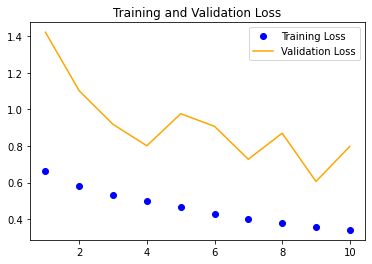

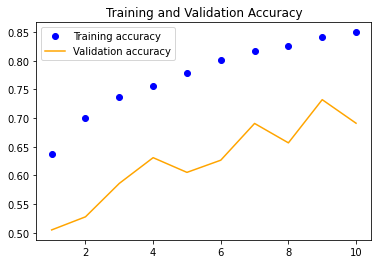

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 [==============================] - 254s 13ms/step


In [ ]:
from sklearn import metrics

print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))

print("AP Score:", metrics.average_precision_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred > 0.5))


ROC AUC Score: 0.9254064849999999
AP Score: 0.9159635546686334
              precision    recall  f1-score   support

           0       0.62      0.98      0.76     10000
           1       0.95      0.41      0.57     10000

    accuracy                           0.69     20000
   macro avg       0.79      0.69      0.67     20000
weighted avg       0.79      0.69      0.67     20000

